In [5]:
import numpy as np
from sklearn.neighbors import KernelDensity

In [3]:
x = np.load('/dfs/scratch2/prabhat8/cs236g/cats_500k.npy')

In [4]:
kde = stats.gaussian_kde(x[:100000].T, 'scott')

In [6]:
data = x[:10000]
n, d = data.shape
scott = n**(-1./(d+4))
print(scott)
kde = KernelDensity(bandwidth=scott).fit(data)

0.982308861816593


In [7]:
data_y = x[-20000:]
scores_y = kde.score_samples(data_y)

(array([2.000e+00, 2.000e+00, 6.000e+00, 2.200e+01, 8.200e+01, 2.920e+02,
        1.150e+03, 4.608e+03, 9.771e+03, 4.065e+03]),
 array([-507.13041582, -503.24845705, -499.36649828, -495.48453952,
        -491.60258075, -487.72062199, -483.83866322, -479.95670445,
        -476.07474569, -472.19278692, -468.31082815]),
 <BarContainer object of 10 artists>)

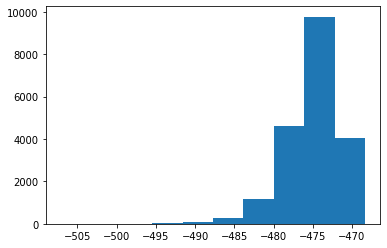

In [9]:
import matplotlib.pyplot as plt
plt.hist(scores_y)
# plt.xlim(-400, 600)

In [17]:
good_mask = scores_y > -480

good_mask.sum()

good_y = data_y[good_mask]

sample = good_y[np.random.choice(len(good_y), 1000)]
sample.shape

(1000, 512)

In [18]:
np.save(f'/dfs/scratch2/prabhat8/cs236g/cats/kde_threshold_480.npy', sample)